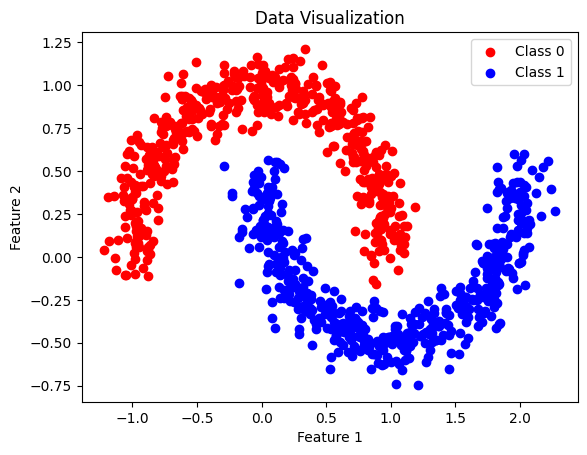

In [1]:
import torch
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate some data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Convert to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Visualize the data
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.title("Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [2]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(2, 50)  # 2 input features, 50 hidden units
        self.fc2 = nn.Linear(50, 50) # Another 50 units layer
        self.fc3 = nn.Linear(50, 2)  # Output layer: 2 outputs for 2 classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the network
model = SimpleMLP()
print(model)

SimpleMLP(
  (fc1): Linear(in_features=2, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [3]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = loss_fn(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.2727
Epoch [20/100], Loss: 0.1166
Epoch [30/100], Loss: 0.0287
Epoch [40/100], Loss: 0.0121
Epoch [50/100], Loss: 0.0058
Epoch [60/100], Loss: 0.0037
Epoch [70/100], Loss: 0.0027
Epoch [80/100], Loss: 0.0022
Epoch [90/100], Loss: 0.0018
Epoch [100/100], Loss: 0.0015


In [4]:
with torch.no_grad():
    y_pred = model(X)
    predicted_classes = torch.argmax(y_pred, axis=1)
    accuracy = (predicted_classes == y).float().mean()
    print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000
